In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import time

In [2]:
model = YOLO('models/bestv8x.pt', task='detect')
image = 'test/test_old.jpg'

/home/jass/repos/valo-yolo/venv/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location=

In [3]:
#Resize the image for best results
def resize_image(image_path, target_size=(640, 640)):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, target_size)
    return resized_image

resized_img = resize_image(image)


0: 640x640 1 enemy, 1 planted spike, 29.9ms
Speed: 7.3ms preprocess, 29.9ms inference, 182.8ms postprocess per image at shape (1, 3, 640, 640)


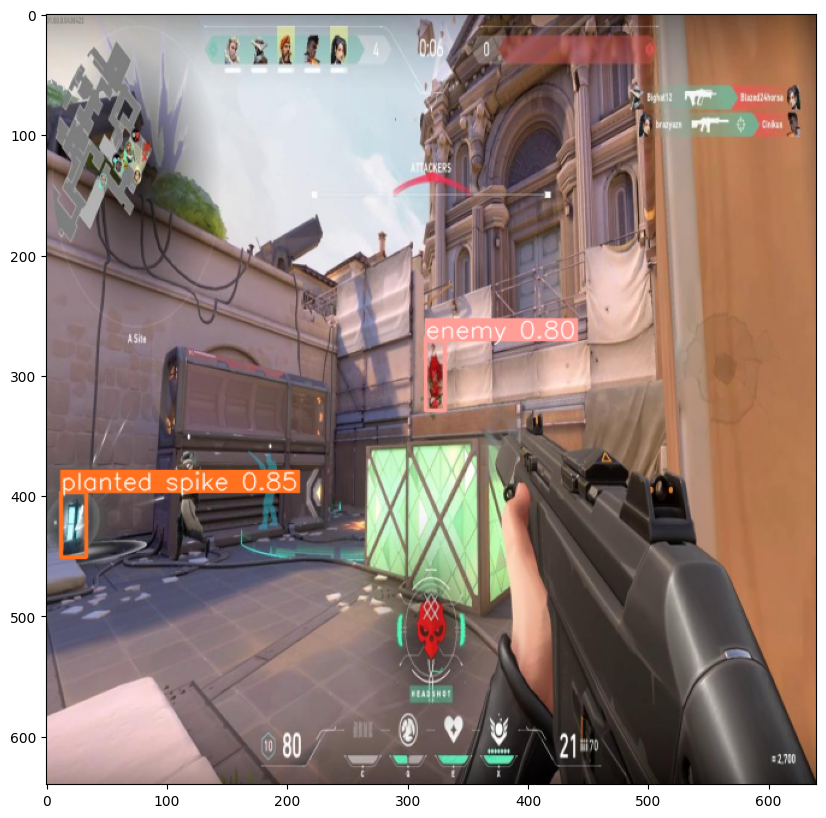

In [4]:
results = model(resized_img)

#Test directly from yolov8 docs
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
    plt.figure(figsize=(10,10))
    plt.imshow(im)

In [5]:
#Video Inference Test
vid = 'test/short-gameplay.mp4'
output_path = 'test/output_video.mp4'

In [6]:
cap = cv2.VideoCapture(vid) #OpenCV Video capture

frame_rate = int(cap.get(5)) #Frame rate of the video
width, height = 640, 640 #Resize

In [7]:
#Video Writer to concat each frame back into a video
video_writer = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 
                               frame_rate, (width, height))

In [8]:
#Keep Track of how many frames its processed
start_time = time.time()
frame_count = 0

#While theres still frames it will continue
while cap.isOpened():
    success, frame = cap.read()
    frame_count += 1
    
    #Each frame is extracted and predicted on
    if success:
        results = model.track(frame, 
                              persist=True, 
                              conf=0.5, 
                              verbose=False,
                              tracker='models/bytetrack.yaml')
        
        annotated_frame = results[0].plot() #Draw bbox
        video_writer.write(annotated_frame) #Add to .mp4
        
        #Prints the progress of the prediction
        if time.time() - start_time > 5:
            print(f'Proccessed {frame_count} frames.')
            start_time = time.time()
    else:
        break
    
video_writer.release()
cap.release()

Proccessed 16 frames.
Proccessed 152 frames.
Proccessed 285 frames.
Proccessed 422 frames.
Proccessed 558 frames.
Proccessed 700 frames.
Proccessed 841 frames.
Proccessed 882 frames.
Proccessed 1016 frames.
